# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

Dandiset 001333, titled "Parkinson's Electrophysiological Signal Dataset (PESD)", includes electrophysiological signals from both healthy and parkinsonian subjects. The dataset focuses on Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) signals from the Subthalamic Nucleus (STN).

More information can be found on [NeuroSift](https://neurosift.app/dandiset/001333).

## What This Notebook Covers

- Loading the Dandiset using the DANDI API
- Examining metadata from the dataset
- Loading and exploring data from an NWB file
- Visualizing data extracted from the NWB file
- Suggestions for future analysis

## Required Packages

Ensure these packages are installed: pynwb, h5py, matplotlib, seaborn

## Connecting to the DANDI Archive

We'll use the DANDI API to connect to the archive and retrieve asset information for Dandiset 001333.


In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 52 assets in the dataset

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Loading an NWB File and Viewing Its Metadata

We'll load the NWB file "sub-healthy-simulated-beta_ses-1044_ecephys.nwb" using PyNWB and examine its metadata.

In [2]:
import pynwb
import h5py
import remfile

# Load NWB file
url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session Start Time: 2025-04-03 12:30:26.094607-04:00


## Visualizing Data from the NWB File

Here, we'll plot some data from the "Beta_Band_Voltage" electrical series within the LFP.

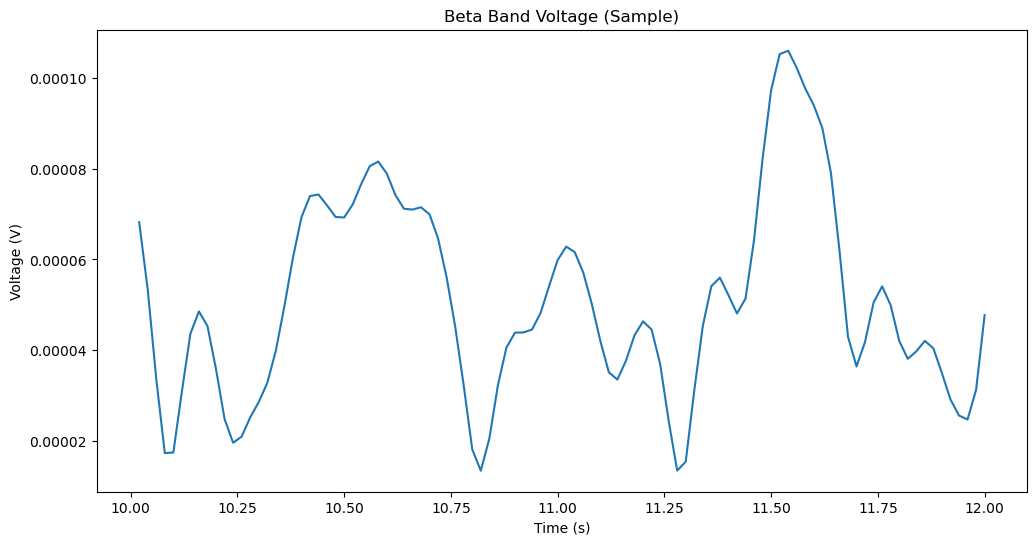

In [3]:
import matplotlib.pyplot as plt

data = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].data[0:100]
timestamps = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].timestamps[0:100]

plt.figure(figsize=(12, 6))
plt.plot(timestamps, data)
plt.title("Beta Band Voltage (Sample)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

## Suggestions for Future Analysis

Researchers can consider analyzing the beta oscillations as biomarkers for Parkinson's disease symptoms. Further exploration into the signal processing techniques used and conducting comparative studies between healthy and Parkinsonian subjects may yield insightful results.

This concludes the guided walkthrough on loading and visualizing data from the Parkinson’s Electrophysiological Signal Dataset (PESD). Researchers are encouraged to explore other files and data types within the dataset for comprehensive insights.